In [1]:
import joblib

import pandas as pd
import numpy as np

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer

import random

random_seed = random.seed(42)

from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 20.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 62.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 11.3 MB/s eta 0:00:00


In [4]:
import catboost as ctb

In [5]:

X_train = pd.read_csv('/datasets/nhanes_diabetes_clean/X_train_ROS.csv', index_col=[0])
y_train = pd.read_csv('/datasets/nhanes_diabetes_clean/y_train_ROS.csv', index_col=[0])
X_test = pd.read_csv('/datasets/nhanes_diabetes_clean/X_test.csv', index_col=[0])
y_test = pd.read_csv('/datasets/nhanes_diabetes_clean/y_test.csv', index_col=[0])

train_features = X_train.columns


le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train_val,'y_train':y_train_val,
                'X_val': X_validation,'y_val':y_validation,
                'X_test': X_test,'y_test':y_test}

In [7]:
# Basic Catboost

In [12]:
%%time

CBC = ctb.CatBoostClassifier()
CBC.fit(training_data['X_train'], training_data['y_train'])
print(CBC)

Learning rate set to 0.097233
0:	learn: 1.0443007	total: 39.6ms	remaining: 39.5s
1:	learn: 1.0001810	total: 75ms	remaining: 37.4s
2:	learn: 0.9604458	total: 108ms	remaining: 35.9s
3:	learn: 0.9273108	total: 142ms	remaining: 35.3s
4:	learn: 0.8969279	total: 177ms	remaining: 35.3s
5:	learn: 0.8720813	total: 211ms	remaining: 34.9s
6:	learn: 0.8471997	total: 246ms	remaining: 34.9s
7:	learn: 0.8265388	total: 281ms	remaining: 34.9s
8:	learn: 0.8086591	total: 319ms	remaining: 35.1s
9:	learn: 0.7919003	total: 353ms	remaining: 35s
10:	learn: 0.7785948	total: 383ms	remaining: 34.4s
11:	learn: 0.7642768	total: 416ms	remaining: 34.3s
12:	learn: 0.7524855	total: 448ms	remaining: 34s
13:	learn: 0.7420541	total: 482ms	remaining: 33.9s
14:	learn: 0.7318713	total: 515ms	remaining: 33.8s
15:	learn: 0.7241566	total: 546ms	remaining: 33.6s
16:	learn: 0.7166015	total: 578ms	remaining: 33.4s
17:	learn: 0.7092099	total: 610ms	remaining: 33.3s
18:	learn: 0.7032424	total: 645ms	remaining: 33.3s
19:	learn: 0.69

In [13]:
y_pred = CBC.predict(training_data['X_test'])

              precision    recall  f1-score   support

     class 1       0.93      0.82      0.87      8419
     class 2       0.52      0.72      0.60      2692
     class 3       0.66      0.67      0.67      1067

    accuracy                           0.78     12178
   macro avg       0.70      0.74      0.71     12178
weighted avg       0.82      0.78      0.79     12178



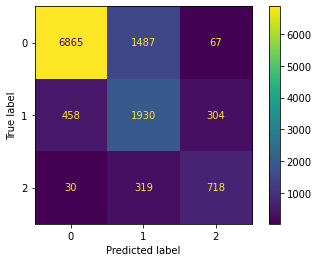

In [14]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(training_data['y_test'], y_pred, target_names=target_names))
cm = confusion_matrix(training_data['y_test'], y_pred, labels=CBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CBC.classes_).plot()
plt.show()



In [ ]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]}

In [15]:
param_test1 = {'depth'         : [4,5,6,7,8,9, 10]}

Grid_CBC1 = GridSearchCV(estimator=CBC, param_grid = param_test1, cv = 2, n_jobs=-1)
Grid_CBC1.fit(training_data['X_train'], training_data['y_train'])



Learning rate set to 0.093856
0:	learn: 1.0514201	total: 72.3ms	remaining: 1m 12s
1:	learn: 1.0134225	total: 97.4ms	remaining: 48.6s
2:	learn: 0.9762580	total: 144ms	remaining: 47.8s
3:	learn: 0.9475210	total: 168ms	remaining: 41.9s
4:	learn: 0.9217668	total: 231ms	remaining: 45.9s
5:	learn: 0.9003476	total: 271ms	remaining: 44.9s
6:	learn: 0.8801276	total: 352ms	remaining: 49.9s
7:	learn: 0.8641407	total: 434ms	remaining: 53.8s
8:	learn: 0.8458162	total: 521ms	remaining: 57.4s
9:	learn: 0.8328289	total: 548ms	remaining: 54.3s
10:	learn: 0.8205273	total: 668ms	remaining: 1m
11:	learn: 0.8084107	total: 710ms	remaining: 58.5s
12:	learn: 0.7976686	total: 772ms	remaining: 58.6s
13:	learn: 0.7873506	total: 840ms	remaining: 59.1s
14:	learn: 0.7789283	total: 954ms	remaining: 1m 2s
15:	learn: 0.7689672	total: 1.04s	remaining: 1m 4s
16:	learn: 0.7624708	total: 1.12s	remaining: 1m 4s
17:	learn: 0.7557762	total: 1.15s	remaining: 1m 2s
18:	learn: 0.7498629	total: 1.24s	remaining: 1m 3s
19:	learn: 

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f3fc824f820>,
             n_jobs=-1, param_grid={'depth': [4, 5, 6, 7, 8, 9, 10]})

In [17]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best


In [18]:
getTrainScores(Grid_CBC1)

({0: "mean:0.8270238891038948params{'depth': 4}",
  1: "mean:0.8495584561798544params{'depth': 5}",
  2: "mean:0.8686627027407381params{'depth': 6}",
  3: "mean:0.883474650810963params{'depth': 7}",
  4: "mean:0.8935545157091088params{'depth': 8}",
  5: "mean:0.8986912007880941params{'depth': 9}",
  6: "mean:0.8997994581852724params{'depth': 10}"},
 {'best_mean': 0.8997994581852724, 'best_param': {'depth': 10}})

In [ ]:
param_test2 = {'depth'         :range(10, 16, 2)}

Grid_CBC2 = GridSearchCV(estimator=CBC, param_grid = param_test2, cv = 2, n_jobs=-1)
Grid_CBC2.fit(training_data['X_train'], training_data['y_train'])



Learning rate set to 0.093856
0:	learn: 1.0437887	total: 1.82s	remaining: 30m 14s
1:	learn: 0.9939773	total: 3.77s	remaining: 31m 22s
2:	learn: 0.9541403	total: 5.63s	remaining: 31m 11s
3:	learn: 0.9153496	total: 7.05s	remaining: 29m 15s
4:	learn: 0.8817704	total: 8.73s	remaining: 28m 57s
5:	learn: 0.8546586	total: 10.4s	remaining: 28m 44s
6:	learn: 0.8311102	total: 11.7s	remaining: 27m 43s
7:	learn: 0.8074654	total: 13s	remaining: 26m 57s
8:	learn: 0.7862876	total: 14.6s	remaining: 26m 47s
9:	learn: 0.7679387	total: 16s	remaining: 26m 25s
10:	learn: 0.7502891	total: 17.3s	remaining: 25m 55s
11:	learn: 0.7338842	total: 18.6s	remaining: 25m 28s
12:	learn: 0.7190678	total: 20s	remaining: 25m 15s
13:	learn: 0.7057010	total: 21.4s	remaining: 25m 6s
14:	learn: 0.6927656	total: 23s	remaining: 25m 10s
15:	learn: 0.6820052	total: 24.5s	remaining: 25m 6s
16:	learn: 0.6703978	total: 26.1s	remaining: 25m 10s
17:	learn: 0.6593723	total: 27.7s	remaining: 25m 12s
18:	learn: 0.6498110	total: 29.2s	re

In [ ]:
getTrainScores(Grid_CBC2)